In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Google Drive Mount
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [4]:
# Linux PC Read CSV
stock_movement_csv = pd.read_csv('/home/diegom/Insync/Institute_of_Data/DATA/Mini Project Data/Stock_Movement.csv')
stock_transactions_csv = pd.read_csv('/home/diegom/Insync/Institute_of_Data/DATA/Mini Project Data/Stock_Transactions.csv')
# Colab Read CSV
# csv = pd.read_csv('/content/gdrive/MyDrive/Institute_of_Data/DATA/Mini Project Data/Stock_Movement.csv', encoding='cp1252')

In [5]:
drop_cols = pd.Series(stock_transactions_csv.columns).iloc[[0,2,3,8,9,11,12,13]]

In [6]:
stock_transactions_csv = stock_transactions_csv.drop(columns = drop_cols)

In [7]:
# Convert Dtypes of date
stock_movement_csv['DocDate'] = pd.to_datetime(stock_movement_csv['DocDate'])
stock_transactions_csv['TransactionDate'] = pd.to_datetime(stock_transactions_csv['TransactionDate'])

In [8]:
stock_movement_csv.shape

(18370, 25)

In [9]:
stock_transactions_csv.shape

(22940, 9)

In [10]:
stock_movement_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18370 entries, 0 to 18369
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0    ID            18370 non-null  int64         
 1   Part           18370 non-null  object        
 2   GroupCode      18370 non-null  object        
 3   GroupName      18370 non-null  object        
 4   Description    18206 non-null  object        
 5   DocDate        18370 non-null  datetime64[ns]
 6   Type           18370 non-null  object        
 7   DocID          18370 non-null  int64         
 8   Reference      18370 non-null  object        
 9   Qty            18370 non-null  float64       
 10  QtyFixedPrice  18370 non-null  float64       
 11  Cost           18370 non-null  float64       
 12  Net            18369 non-null  float64       
 13  IsFixedPrice   18370 non-null  bool          
 14  AccountID      16323 non-null  float64       
 15  CustomerID     1837

In [14]:
stock_transactions_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22940 entries, 0 to 22939
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Part             22940 non-null  object        
 1   TransactionDate  22940 non-null  datetime64[ns]
 2   SourceTypeID     22940 non-null  int64         
 3   SourceType       22940 non-null  object        
 4   SourceID         22940 non-null  int64         
 5   Qty              22940 non-null  float64       
 6   NewTotalQty      22937 non-null  float64       
 7   DocumentID       21283 non-null  float64       
 8   Contact          22266 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.6+ MB


In [11]:
stock_transactions_csv.head()

,Part,TransactionDate,SourceTypeID,SourceType,SourceID,Qty,NewTotalQty,DocumentID,Contact
0,10I-SERIES,2020-07-31,29,Supplier Invoice,132,1.0,1.0,27.0,Automotive Test Solutions - ATS
1,10I-SERIES,2020-09-15,21,Customer Invoice,4244,-1.0,0.0,1498.0,Wittaya Mala
2,AIR-CPM-20,2021-12-04,29,Supplier Invoice,1644,5.0,5.0,198.0,TENG TOOLS
3,AIR-CSW-02,2021-05-25,29,Supplier Invoice,1759,2.0,2.0,228.0,TENG TOOLS
4,AIR-R420FC,2020-06-07,29,Supplier Invoice,2,25.0,32.0,1.0,TENG TOOLS


In [12]:
sales_2020 = stock_transactions_csv[(stock_transactions_csv['SourceType']=='Customer Invoice') & (stock_transactions_csv['TransactionDate'] < '2021')]
sales_2020['Month'] = sales_2020['TransactionDate'].dt.month
sales_2020.head()

<ipython-input-12-3f824e5e9ff3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2020['Month'] = sales_2020['TransactionDate'].dt.month


,Part,TransactionDate,SourceTypeID,SourceType,SourceID,Qty,NewTotalQty,DocumentID,Contact,Month
1,10I-SERIES,2020-09-15,21,Customer Invoice,4244,-1.0,0.0,1498.0,Wittaya Mala,9
5,AIR-R420FC,2020-07-22,21,Customer Invoice,561,-1.0,31.0,185.0,Jake Stalker,7
6,AIR-R420FC,2020-07-22,21,Customer Invoice,636,-1.0,30.0,210.0,David Kidd,7
7,AIR-R420FC,2020-07-22,21,Customer Invoice,707,-1.0,29.0,233.0,THERESA Wilson,7
8,AIR-R420FC,2020-07-22,21,Customer Invoice,936,-1.0,28.0,303.0,Joel Hili,7


In [13]:
sales_2021 = stock_transactions_csv[(stock_transactions_csv['SourceType']=='Customer Invoice') & (stock_transactions_csv['TransactionDate'] >= '2021')]
sales_2021['Month'] = sales_2021['TransactionDate'].dt.month
sales_2021.head()

<ipython-input-13-420a54355d2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_2021['Month'] = sales_2021['TransactionDate'].dt.month


,Part,TransactionDate,SourceTypeID,SourceType,SourceID,Qty,NewTotalQty,DocumentID,Contact,Month
22,AIR-R420FC,2021-06-01,21,Customer Invoice,10678,-1.0,17.0,4254.0,David Kidd,6
23,AIR-R420FC,2021-02-26,21,Customer Invoice,13592,-1.0,16.0,5511.0,DARYL NIPPS,2
24,AIR-R420FC,2021-02-26,21,Customer Invoice,13563,-3.0,13.0,5490.0,Daryl Stewart,2
25,AIR-R420FC,2021-02-26,21,Customer Invoice,13606,-1.0,12.0,5517.0,DARYL NIPPS,2
26,AIR-R420FC,2021-03-03,21,Customer Invoice,14023,-1.0,11.0,5686.0,Greg Sinian,3


In [18]:
sales_2020.shape

(8858, 10)

In [19]:
sales_2021.shape

(9814, 10)

In [20]:
stock_transactions_csv.columns

Index(['Part', 'TransactionDate', 'SourceTypeID', 'SourceType', 'SourceID',
       'Qty', 'NewTotalQty', 'DocumentID', 'Contact'],
      dtype='object')

In [21]:
stock_transactions_csv.SourceType.unique()

array(['Supplier Invoice', 'Customer Invoice', 'Adjustment',
       'Value adjustment: Supplier Invoice', 'Customer Credit Note',
       'Customer Invoice Undo',
       'Value adjustment: Supplier Invoice Checking', 'Supplier Credits'],
      dtype=object)

In [22]:
stock_transactions_csv[stock_transactions_csv['SourceType'] == 'Customer Invoice']['Qty'].sum()

-19961.0

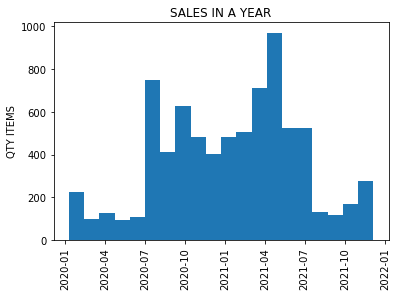

In [23]:
plt.hist(stock_movement_csv[(stock_movement_csv['Type']=='Invoice') & (stock_movement_csv['GroupCode']=='OZWIDE')]['DocDate'], bins=20)
plt.title('SALES IN A YEAR')
plt.xticks(rotation=90)
plt.ylabel("QTY ITEMS")
plt.show()

In [24]:
primary_supplyers = pd.Series(stock_transactions_csv[stock_transactions_csv['SourceType'] == 'Supplier Invoice']['Contact'].unique()).iloc[[3,4,6,7,12,14,22]]
primary_supplyers

3             HCB Gu Siang Tools Develop Co., Ltd.
4                                        SILVERADO
6     Taiwan Foremost Hardware Industrial Co. Ltd.
7               JTC Jet-Way Global Trading Co. Ltd
12                                 Endeavour Tools
14                                            Ebay
22                     AUTOOL Technology Co., Ltd.
dtype: object

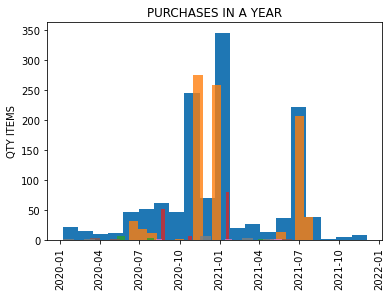

In [25]:
plt.hist(stock_transactions_csv[stock_transactions_csv['SourceType']=='Supplier Invoice']['TransactionDate'], bins=20)
for i in primary_supplyers:
    plt.hist(stock_transactions_csv[(stock_transactions_csv['SourceType']=='Supplier Invoice') & (stock_transactions_csv['Contact']==i)]['TransactionDate'], bins=20, alpha=0.8)
plt.xticks(rotation=90)
plt.title("PURCHASES IN A YEAR")
plt.ylabel("QTY ITEMS")
plt.show()

In [26]:
stock_transactions_csv[(stock_transactions_csv['Contact'].isin(primary_supplyers)) & (stock_transactions_csv['SourceType']=='Supplier Invoice')]

,Part,TransactionDate,SourceTypeID,SourceType,SourceID,Qty,NewTotalQty,DocumentID,Contact
77,AIR-REURO,2021-06-30,29,Supplier Invoice,1934,20.0,21.0,248.0,"HCB Gu Siang Tools Develop Co., Ltd."
100,DM10-501AD,2020-05-11,29,Supplier Invoice,1021,40.0,40.0,135.0,SILVERADO
109,DM10-5074,2020-05-11,29,Supplier Invoice,1022,50.0,50.0,135.0,SILVERADO
157,DM10-6164,2020-07-27,29,Supplier Invoice,138,40.0,40.0,29.0,SILVERADO
165,DM10-6191,2020-07-27,29,Supplier Invoice,135,15.0,14.0,29.0,SILVERADO
...,...,...,...,...,...,...,...,...,...
18901,MISC-CONSUMABLES,2020-11-09,29,Supplier Invoice,515,50.0,50.0,66.0,"HCB Gu Siang Tools Develop Co., Ltd."
18902,MISC-CONSUMABLES,2020-11-09,29,Supplier Invoice,563,50.0,50.0,66.0,"HCB Gu Siang Tools Develop Co., Ltd."
18911,MISC-CONSUMABLES,2020-12-28,29,Supplier Invoice,1323,1000.0,1000.0,154.0,"HCB Gu Siang Tools Develop Co., Ltd."
18949,MISCELLANEOUS,2021-05-21,29,Supplier Invoice,1735,1.0,1141.0,220.0,"HCB Gu Siang Tools Develop Co., Ltd."


/home/diemol/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


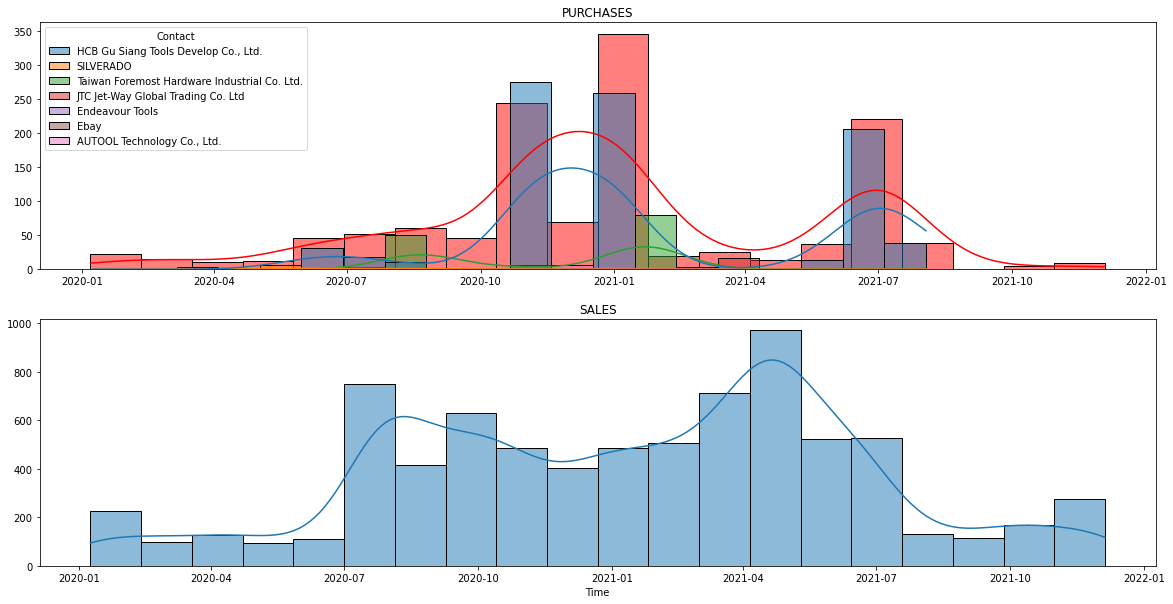

In [27]:
# sns.histplot(data = stock_transactions_csv, x = "TransactionDate", bins=20, kde = True)

fig, ax = plt.subplots(2, 1, figsize=(20, 10))
sns.histplot(data = stock_transactions_csv[stock_transactions_csv['SourceType']=='Supplier Invoice'], x = "TransactionDate", bins = 20, color = 'r', kde = True, ax=ax[0])
sns.histplot(data = stock_transactions_csv[(stock_transactions_csv['Contact'].isin(primary_supplyers)) & (stock_transactions_csv['SourceType']=='Supplier Invoice')], x = "TransactionDate", 
             hue = 'Contact', bins = 20, kde = True, ax=ax[0]).set(title = "PURCHASES", xlabel = None, ylabel=None)
sns.histplot(data = stock_movement_csv[(stock_movement_csv['Type']=='Invoice') & (stock_movement_csv['GroupCode']=='OZWIDE')]['DocDate'], bins=20, ax=ax[1], kde = True).set(title = "SALES", xlabel = "Time"
            , ylabel = None)
plt.show()

In [60]:
Part_2020_Counts = pd.DataFrame(sales_2020['Part'].value_counts())
Part_2020_Counts = Part_2020_Counts[Part_2020_Counts.index.str.endswith('-R')!=True]
Part_2020_Counts = Part_2020_Counts.drop(index = ['NETO FREIGHT','FREIGHT','RENT-EXT','SEC-BOND','MISC SERVICE'])
TOP_10_2020 = Part_2020_Counts.sort_values(by = 'Part', ascending = False).head(10)

In [63]:
Part_2021_Counts = pd.DataFrame(sales_2021['Part'].value_counts())
Part_2021_Counts = Part_2021_Counts[Part_2021_Counts.index.str.endswith('-R')!=True]
Part_2021_Counts = Part_2021_Counts.drop(index = ['NETO FREIGHT','FREIGHT','RENT-EXT','SEC-BOND','MISC SERVICE'])
TOP_10_2021 = Part_2021_Counts.sort_values(by = 'Part', ascending = False).head(10)

/home/diemol/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/diemol/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


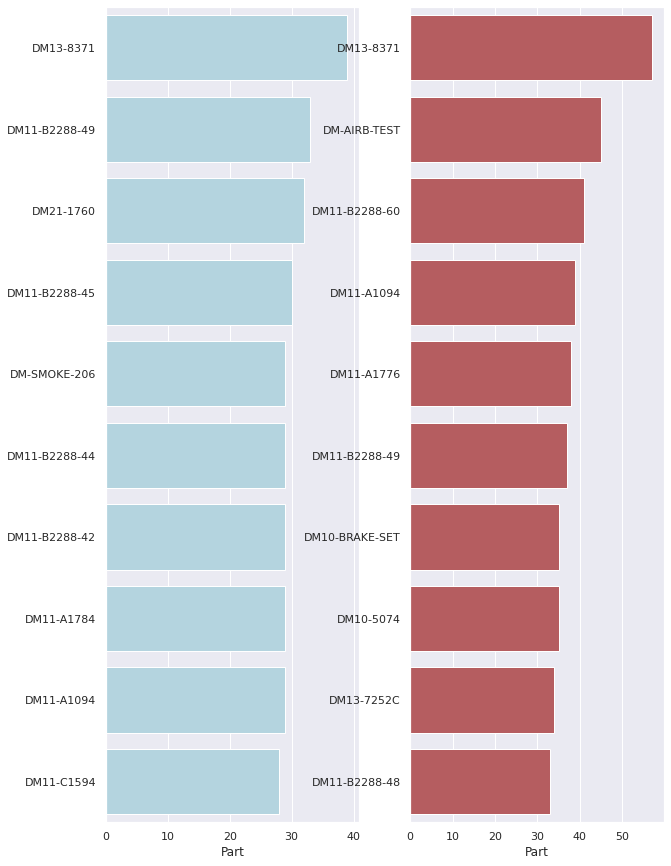

In [125]:
fig, ax = plt.subplots(1, 2, figsize=(10, 15))
sns.set_theme(style="whitegrid")
sns.barplot(TOP_10_2020['Part'], TOP_10_2020.index.astype('str'), orient = 'h',color='lightblue', data=TOP_10_2020, ax=ax[0])
sns.barplot(TOP_10_2021['Part'], TOP_10_2021.index.astype('str'), orient = 'h',color='r', data=TOP_10_2021, ax=ax[1])
sns.set(rc={'figure.figsize':(5,10)})
plt.show()

In [39]:
df_to_list = stock_transactions_csv
column_list = df_to_list.columns.values.tolist()
for column_name in column_list:
    print([column_name])
    print(df_to_list[column_name].unique())


['StockID']
[4283 4581 4615 ... 4564 2369 2370]
['Part']
['10I-SERIES' 'AIR-CPM-20' 'AIR-CSW-02' ... 'USB-C-ADAPT' 'WB325510'
 'WH-710755']
['StockDescription']
[nan '1/4" Male Swivel Joint' 'Universal Swivel Joint - Block Style' ...
 'USB-C Adapter for Surface Tablet' 'TORQUE WRENCH 140-680NM 3/4"'
 'WHI518SIDE SHELF']
['TransactionID']
[ 5070  7726 21036 ... 18368  4984 26584]
['TransactionDate']
['2020-07-31T00:00:00.000000000' '2020-09-15T00:00:00.000000000'
 '2021-12-04T00:00:00.000000000' '2021-05-25T00:00:00.000000000'
 '2020-06-07T00:00:00.000000000' '2020-07-22T00:00:00.000000000'
 '2020-07-24T00:00:00.000000000' '2020-07-28T00:00:00.000000000'
 '2020-08-17T00:00:00.000000000' '2020-02-09T00:00:00.000000000'
 '2020-11-09T00:00:00.000000000' '2020-09-23T00:00:00.000000000'
 '2020-09-24T00:00:00.000000000' '2020-10-20T00:00:00.000000000'
 '2020-11-25T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2021-06-01T00:00:00.000000000' '2021-02-26T00:00:00.000000000'
 '2021-03-03T

In [40]:
df_to_list = stock_movement_csv
column_list = df_to_list.columns.values.tolist()
for column_name in column_list:
    print([column_name])
    print(df_to_list[column_name].unique())

[' ID']
[4283    1    4 ... 4564 2368 2369]
['Part']
['10I-SERIES' 'AIR-R420FC' 'AIR-R420MN' ... 'USB-C-ADAPT' 'VM-1085-R'
 'WB325510']
['GroupCode']
['OZWIDE' 'RENT' 'OTHER' 'FREIGHT']
['GroupName']
['OZWIDE Parts' 'Rental Equipment' 'Other' 'Freight']
['Description']
[nan '1/4" Female Coupler R420FC' '1/4" Male Nipple 420MN' ...
 'USB-C Adapter for Surface Tablet'
 'Chrysler / Jeep Camshaft Gear Locking Tool - 2.8L CRD'
 'TORQUE WRENCH 140-680NM 3/4"']
['DocDate']
['2020-09-15T00:00:00.000000000' '2020-07-22T00:00:00.000000000'
 '2020-07-24T00:00:00.000000000' '2020-07-28T00:00:00.000000000'
 '2020-08-17T00:00:00.000000000' '2020-11-09T00:00:00.000000000'
 '2020-09-23T00:00:00.000000000' '2020-09-24T00:00:00.000000000'
 '2020-10-20T00:00:00.000000000' '2020-11-25T00:00:00.000000000'
 '2020-03-12T00:00:00.000000000' '2021-06-01T00:00:00.000000000'
 '2021-02-26T00:00:00.000000000' '2021-03-03T00:00:00.000000000'
 '2021-08-03T00:00:00.000000000' '2021-03-24T00:00:00.000000000'
 '2021-01

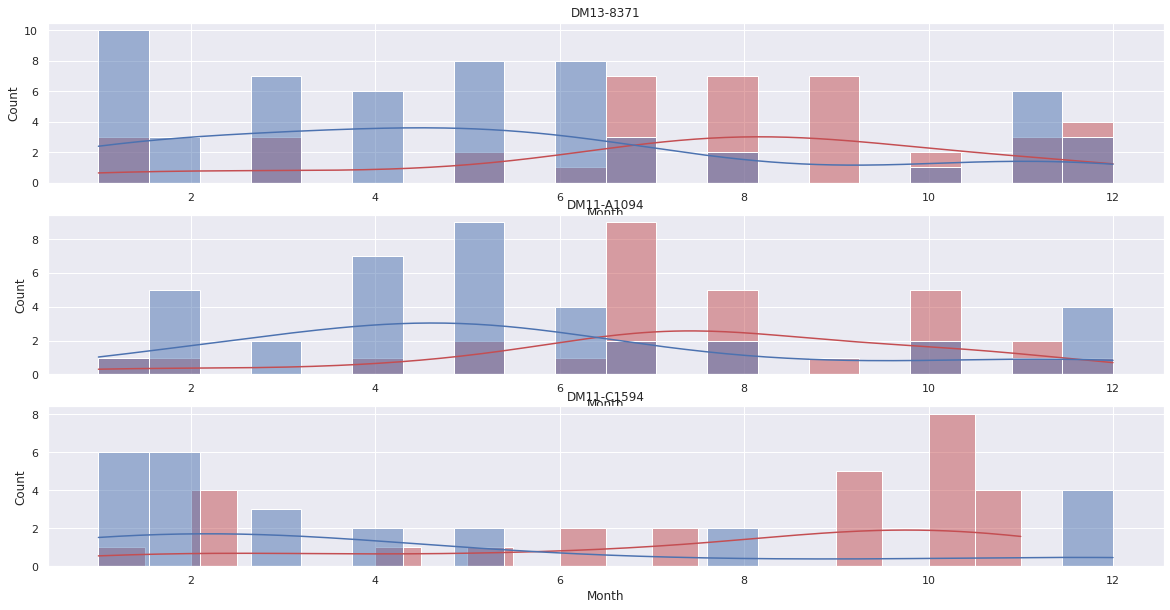

In [144]:
# Sales behaviour DM13-8371
fig, ax = plt.subplots(3,1, figsize=(20, 10))
sns.histplot(data=sales_2020[sales_2020['Part']=='DM13-8371'], x='Month', bins=20, kde=True, color='r', ax=ax[0]).set_title('DM13-8371')
sns.histplot(data = sales_2021[sales_2021['Part']=='DM13-8371'], x='Month', bins=20, kde=True, ax=ax[0])
sns.histplot(data=sales_2020[sales_2020['Part']=='DM11-A1094'], x='Month', bins=20, kde=True, color='r', ax=ax[1]).set_title('DM11-A1094')
sns.histplot(data = sales_2021[sales_2021['Part']=='DM11-A1094'], x='Month', bins=20, kde=True, ax=ax[1])
sns.histplot(data=sales_2020[sales_2020['Part']=='DM11-C1594'], x='Month', bins=20, kde=True, color='r', ax=ax[2]).set_title('DM11-C1594')
sns.histplot(data = sales_2021[sales_2021['Part']=='DM11-C1594'], x='Month', bins=20, kde=True, ax=ax[2])
plt.show()

In [149]:
sales_2020[sales_2020['Part']=='DM13-8371']['NewTotalQty']

10743    22.0
10744    21.0
10745    18.0
10746    13.0
10747    12.0
10748    11.0
10749    10.0
10750     9.0
10751     8.0
10754     7.0
10755     6.0
10756     5.0
10758     5.0
10759    44.0
10760    43.0
10761    42.0
10762    41.0
10763    40.0
10764    39.0
10765    38.0
10766    37.0
10767    36.0
10768    35.0
10769    34.0
10770    33.0
10771    32.0
10772    31.0
10774    29.0
10775    28.0
10776    27.0
10777    26.0
10778    25.0
10779    24.0
10780    23.0
10781    22.0
10782    21.0
10783    20.0
10784    19.0
10785    18.0
Name: NewTotalQty, dtype: float64

In [151]:
sales_2020[sales_2020['Part']=='DM13-8371']

,Part,TransactionDate,SourceTypeID,SourceType,SourceID,Qty,NewTotalQty,DocumentID,Contact,Month
10743,DM13-8371,2020-07-24,21,Customer Invoice,1706,-1.0,22.0,568.0,LUKE Carbyne Automotive - CAP,7
10744,DM13-8371,2020-07-28,21,Customer Invoice,1771,-1.0,21.0,592.0,Mohammed Maqbool,7
10745,DM13-8371,2020-07-30,21,Customer Invoice,2363,-1.0,18.0,796.0,Darren Roberts,7
10746,DM13-8371,2020-07-31,21,Customer Invoice,2407,-1.0,13.0,816.0,Mike Telling,7
10747,DM13-8371,2020-05-08,21,Customer Invoice,2460,-1.0,12.0,826.0,Gavin Brooks,5
10748,DM13-8371,2020-07-08,21,Customer Invoice,2935,-1.0,11.0,999.0,Matty Hall,7
10749,DM13-8371,2020-11-08,21,Customer Invoice,3186,-1.0,10.0,1094.0,Ben Town,11
10750,DM13-8371,2020-08-13,21,Customer Invoice,3327,-1.0,9.0,1148.0,Tony Ryan,8
10751,DM13-8371,2020-08-17,21,Customer Invoice,3465,-1.0,8.0,1202.0,Rachel McCoombe,8
10754,DM13-8371,2020-08-25,21,Customer Invoice,3925,-1.0,7.0,1375.0,shane parsons,8


/home/diemol/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/diemol/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/diemol/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn

<AxesSubplot:xlabel='Part', ylabel='NewTotalQty'>

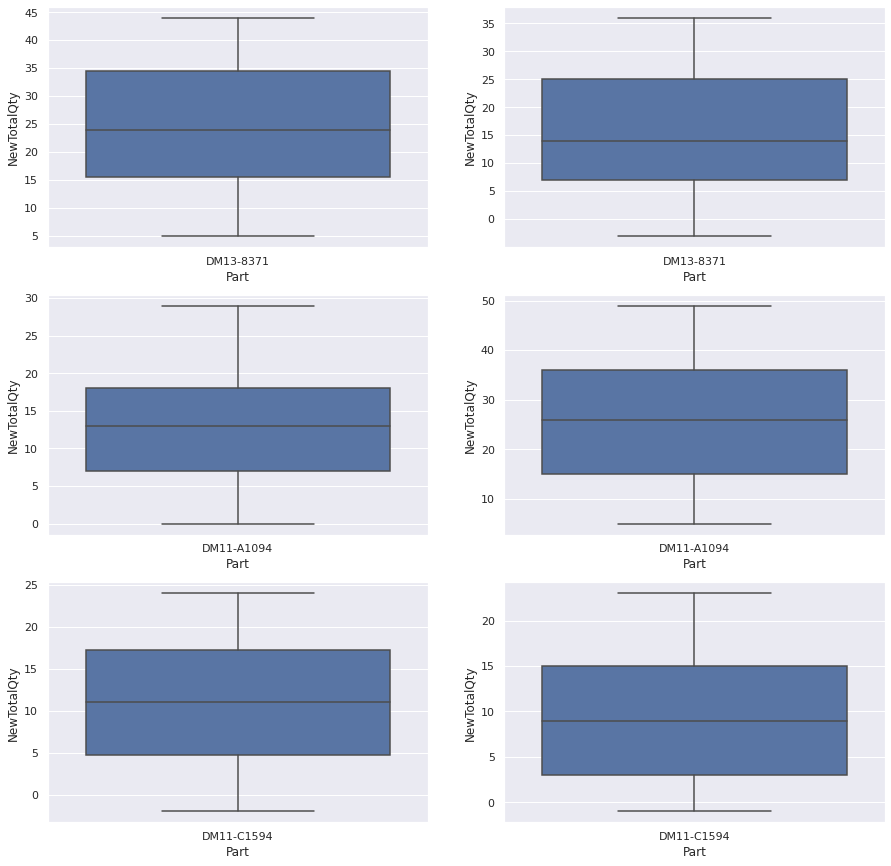

In [163]:
fig, ax = plt.subplots(3,2, figsize=(15, 15))
sns.boxplot(sales_2020[sales_2020['Part']=='DM13-8371']['Part'],sales_2020[sales_2020['Part']=='DM13-8371']['NewTotalQty'], ax=ax[0,0])
sns.boxplot(sales_2021[sales_2021['Part']=='DM13-8371']['Part'],sales_2021[sales_2021['Part']=='DM13-8371']['NewTotalQty'], ax=ax[0,1])
sns.boxplot(sales_2020[sales_2020['Part']=='DM11-A1094']['Part'],sales_2020[sales_2020['Part']=='DM11-A1094']['NewTotalQty'], ax=ax[1,0])
sns.boxplot(sales_2021[sales_2021['Part']=='DM11-A1094']['Part'],sales_2021[sales_2021['Part']=='DM11-A1094']['NewTotalQty'], ax=ax[1,1])
sns.boxplot(sales_2020[sales_2020['Part']=='DM11-C1594']['Part'],sales_2020[sales_2020['Part']=='DM11-C1594']['NewTotalQty'], ax=ax[2,0])
sns.boxplot(sales_2021[sales_2021['Part']=='DM11-C1594']['Part'],sales_2021[sales_2021['Part']=='DM11-C1594']['NewTotalQty'], ax=ax[2,1])

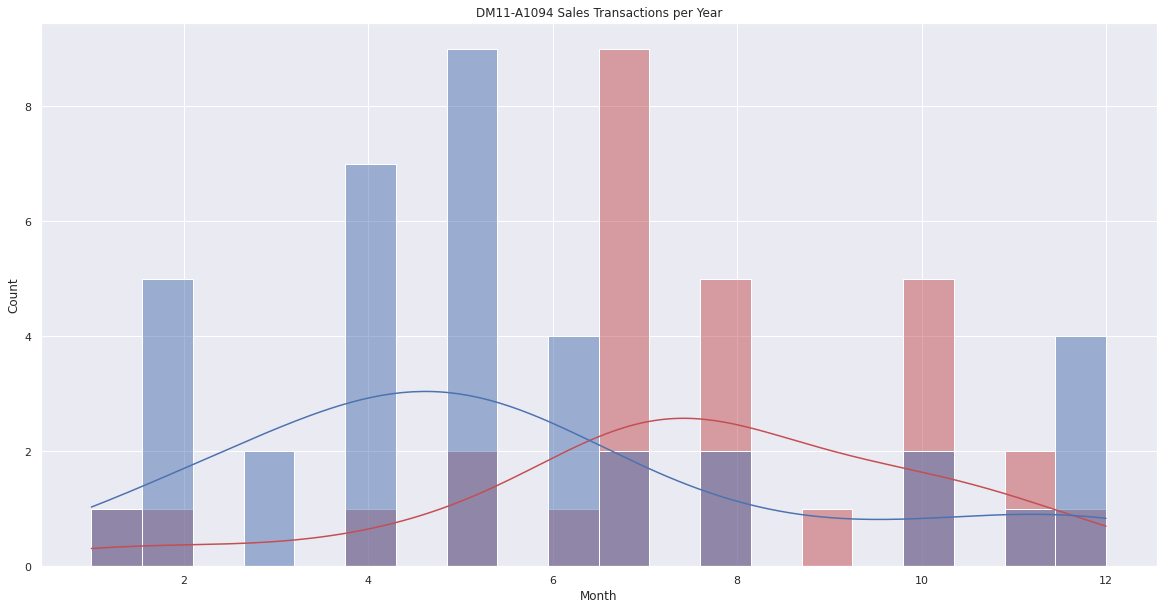

In [127]:
plt.subplots(figsize=(20, 10))
sns.histplot(data=sales_2020[sales_2020['Part']=='DM11-A1094'], x='Month', bins=20, kde=True, color='r')
sns.histplot(data = sales_2021[sales_2021['Part']=='DM11-A1094'], x='Month', bins=20, kde=True)
plt.title("DM11-A1094 Sales Transactions per Year")
plt.show()

In [80]:
alpha = 0.05
N = 25

In [98]:
DM13_8371_2020 = sales_2020[sales_2020['Part']=='DM13-8371']['NewTotalQty'].sample(N)

In [99]:
DM13_8371_2021 = sales_2021[sales_2021['Part']=='DM13-8371']['NewTotalQty'].sample(N)

In [100]:
DM11_A1094_2020 = sales_2020[sales_2020['Part']=='DM11-A1094']['NewTotalQty'].sample(N)

In [101]:
DM11_A1094_2021 = sales_2021[sales_2021['Part']=='DM11-A1094']['NewTotalQty'].sample(N)

In [102]:
DM11_C1594_2020 = sales_2020[sales_2020['Part']=='DM11-C1594']['NewTotalQty'].sample(N)

In [103]:
DM11_C1594_2021 = sales_2021[sales_2021['Part']=='DM11-C1594']['NewTotalQty'].sample(N)

In [104]:
# DM13-8371 Var
print(np.var(DM13_8371_2020, ddof=1))
print(np.var(DM13_8371_2021, ddof=1))

133.4933333333333
119.64333333333333


In [105]:
print(np.var(DM11_A1094_2020, ddof=1))
print(np.var(DM11_A1094_2021, ddof=1))

64.57333333333332
212.5066666666667


In [107]:
print(np.var(DM11_C1594_2020, ddof=1))
print(np.var(DM11_C1594_2021, ddof=1))

64.69000000000001
58.74999999999999


In [108]:
from scipy import stats

In [110]:
t2, p2 = stats.ttest_ind(DM13_8371_2020, DM13_8371_2021)
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.4386765215870656
p = 0.01849069375408025


In [111]:
t2, p2 = stats.ttest_ind(DM11_A1094_2020, DM11_A1094_2021)
print("t = " + str(t2))
print("p = " + str(p2))

t = -3.8808774470362226
p = 0.0003170639980230442


In [113]:
t2, p2 = stats.ttest_ind(DM11_C1594_2020, DM11_C1594_2021)
print("t = " + str(t2))
print("p = " + str(p2))

t = 0.5220354996210025
p = 0.6040465054155892
